<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/SUPPORT2_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
support2 = fetch_ucirepo(id=880)

In [124]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

In [125]:
ohe = OneHotEncoder()
list1 = ['race']
for i in list1:
  myohedzgroup = ohe.fit_transform(df[i].values.reshape(-1,1)).toarray()
  myohedzgroup=pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])
  df=df.drop([i], axis=1)
  df=pd.concat([df,myohedzgroup],axis=1)

df = df.drop(df.columns[25], axis = 1)

In [ ]:
df = df.dropna(axis = 0, how = 'any')
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

In [130]:
targets = df['dzgroup']
features = (df.drop('dzgroup', axis = 1))

In [131]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logregmodel = logreg.fit(X_train, y_train)
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
logreg.score(X_test, y_test)

0.5451388888888888

In [133]:
logreg.score(X_train, y_train)

0.5528273809523809

In [134]:
print(classification_report(y_test, yhat_test))

                   precision    recall  f1-score   support

ARF/MOSF w/Sepsis       0.56      0.89      0.68       510
              CHF       0.44      0.30      0.35       149
             COPD       0.50      0.31      0.38       134
        Cirrhosis       0.58      0.10      0.18        67
     Colon Cancer       1.00      0.04      0.08        23
             Coma       0.75      0.51      0.61        92
      Lung Cancer       0.38      0.37      0.38        75
     MOSF w/Malig       1.00      0.07      0.13       102

         accuracy                           0.55      1152
        macro avg       0.65      0.32      0.35      1152
     weighted avg       0.59      0.55      0.49      1152



Training Accuracy: 0.5528273809523809

Test Accuracy: 0.5451388888888888

Classification Report:
                   precision    recall  f1-score   support

ARF/MOSF w/Sepsis       0.56      0.89      0.68       510
              CHF       0.44      0.30      0.35       149
             COPD       0.50      0.31      0.38       134
        Cirrhosis       0.58      0.10      0.18        67
     Colon Cancer       1.00      0.04      0.08        23
             Coma       0.75      0.51      0.61        92
      Lung Cancer       0.38      0.37      0.38        75
     MOSF w/Malig       1.00      0.07      0.13       102

         accuracy                           0.55      1152
        macro avg       0.65      0.32      0.35      1152
     weighted avg       0.59      0.55      0.49      1152


Test Confusion Matrix:
[[453  19  13   1   0  13  11   0]
 [ 79  44  11   2   0   1  12   0]
 [ 72  12  41   2   0   0   7   0]
 [ 54   1   1   7   0   1   3   0]
 [  8   3   5   0   1   0   

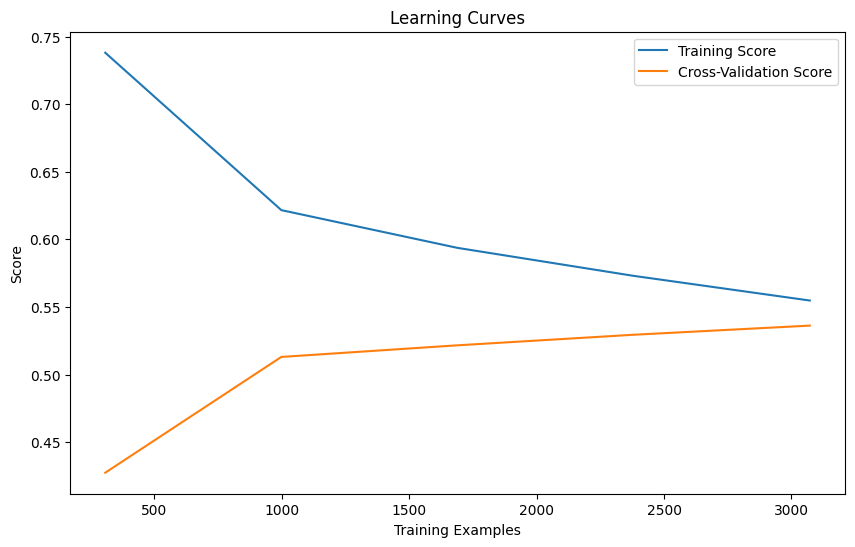

In [135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

train_accuracy = accuracy_score(y_train, yhat_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, yhat_test)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, yhat_test))

conf_matrix = confusion_matrix(y_test, yhat_test)
print("\nTest Confusion Matrix:")
print(conf_matrix)

from sklearn.model_selection import learning_curve

X = features
y = targets

# Assuming you have X, y, and a model
train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

Based on the following results, with a higher training score and a slightly lower cross-validation score, this indicates that there is overfitting in the model, and therefore may not be the best model for producing the correct output.